In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

from time_series_extractor import *
from SubjectMagicFeatures import *
from featureExtractor import *
from plots import *


In [11]:
features = extractAndSaveAll(out_file="features/all_div.csv", ref_to_base=True, mode="div")
#features = pd.read_csv("features/all.csv", sep='\t')

LOAD s4 from frontiers
LOAD s5 from frontiers
LOAD s6 from frontiers
LOAD s7 from frontiers
LOAD s8 from frontiers
LOAD s10 from frontiers
LOAD s11 from frontiers
LOAD s12 from frontiers
LOAD s13 from frontiers
LOAD s14 from frontiers
LOAD s15 from frontiers
LOAD s16 from frontiers
LOAD s18 from frontiers
LOAD s20 from frontiers
LOAD s21 from frontiers
LOAD s22 from frontiers
LOAD s25 from frontiers
LOAD s5 from pilot
LOAD s6 from pilot
LOAD s8 from pilot
LOAD s9 from pilot
LOAD s10 from pilot
LOAD s11 from pilot
LOAD s12 from pilot
LOAD s15 from pilot


In [15]:
plot_column_names = [
        'subject',
        #'source',
        'duration',
        'card_class',
        #'show_order',
        'fix_freq','sacc_freq',
        'pd_right_mean','pd_right_std','pd_right_min','pd_right_max',
        'pd_left_mean','pd_left_std','pd_left_min','pd_left_max',
        'sre_fix_freq','sre_sacc_freq',
        'sre_pd_right_mean','sre_pd_right_std',
        'sre_pd_right_min','sre_pd_right_max',
        'sre_pd_left_mean','sre_pd_left_std',
        'sre_pd_left_min','sre_pd_left_max',
        'srl_fix_freq','srl_sacc_freq',
        'srl_pd_right_mean','srl_pd_right_std',
        'srl_pd_right_min','srl_pd_right_max',
        'srl_pd_left_mean','srl_pd_left_std',
        'srl_pd_left_min','srl_pd_left_max',
        'label'
    ]

feat_cols = [
        'duration',
        'fix_freq',
        'sacc_freq',
        'pd_right_mean',
        'pd_right_std',
        'pd_right_min',
        'pd_right_max',
        'pd_left_mean',
        'pd_left_std',
        'pd_left_min',
        'pd_left_max',
        'sre_fix_freq',
        'sre_sacc_freq',
        'sre_pd_right_mean',
        'sre_pd_right_std',
        'sre_pd_right_min',
        'sre_pd_right_max',
        'sre_pd_left_mean',
        'sre_pd_left_std',
        'sre_pd_left_min',
        'sre_pd_left_max',
        'srl_fix_freq',
        'srl_sacc_freq',
        'srl_pd_right_mean',
        'srl_pd_right_std',
        'srl_pd_right_min',
        'srl_pd_right_max',
        'srl_pd_left_mean',
        'srl_pd_left_std',
        'srl_pd_left_min',
        'srl_pd_left_max',
        'label'
    ]


def bigAggregation(features, sub, cols, aggrZeros, aggrOnes):
    data = features[cols].loc[features['subject'] == sub]
    zeros = data.loc[features['label'] == 0].drop(['card_class'], axis=1)
    ones = data.loc[features['label'] == 1]

    for col in zeros.columns:
        zeros[col] = zeros[col].mean()
    zeros = zeros.head(1)
    zeros['card_class'] = "avg"
    
    aggrZeros = aggrZeros.append(zeros, ignore_index=True)
    aggrOnes = aggrOnes.append(ones, ignore_index=True)
    
    return aggrZeros, aggrOnes

In [16]:
aggrZeros = pd.DataFrame(columns=plot_column_names)
aggrOnes = pd.DataFrame(columns=plot_column_names)

markers=['o','.',',','v','^','<','>','8','s','p','P','*','h','H','+','x','X','D','d','|','_','1','2','3','4']
subjects = features.groupby('subject').count().index.values
subjects

for sub in subjects:
    aggrZeros, aggrOnes = bigAggregation(features, sub, plot_column_names, aggrZeros, aggrOnes)


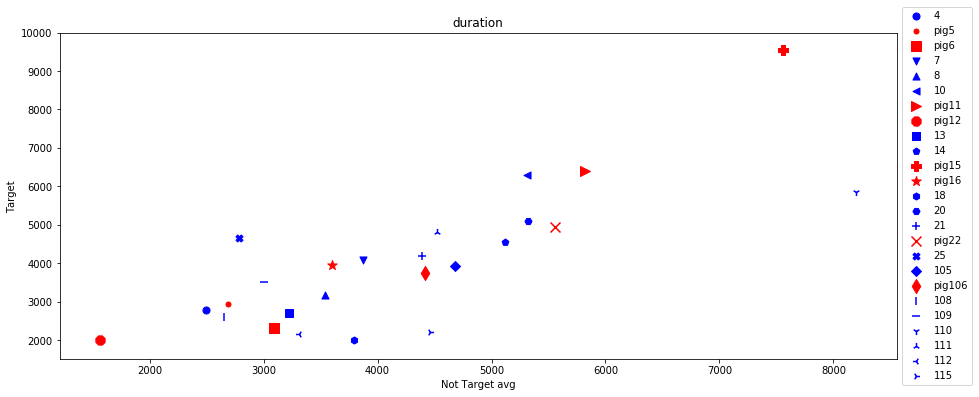

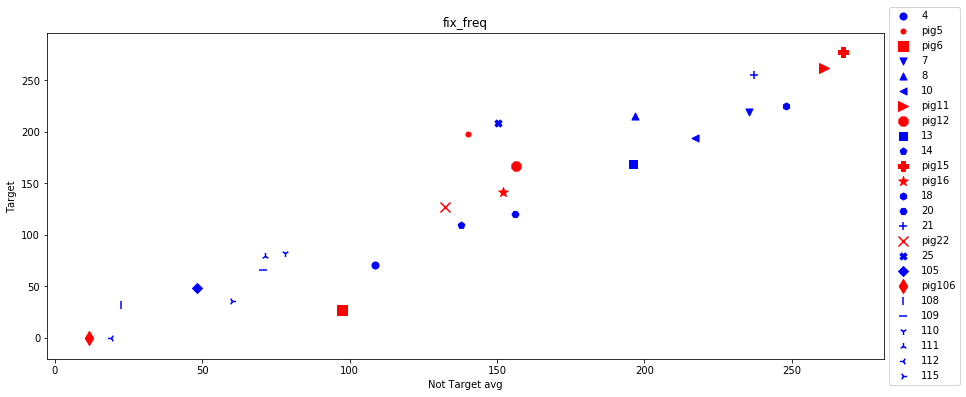

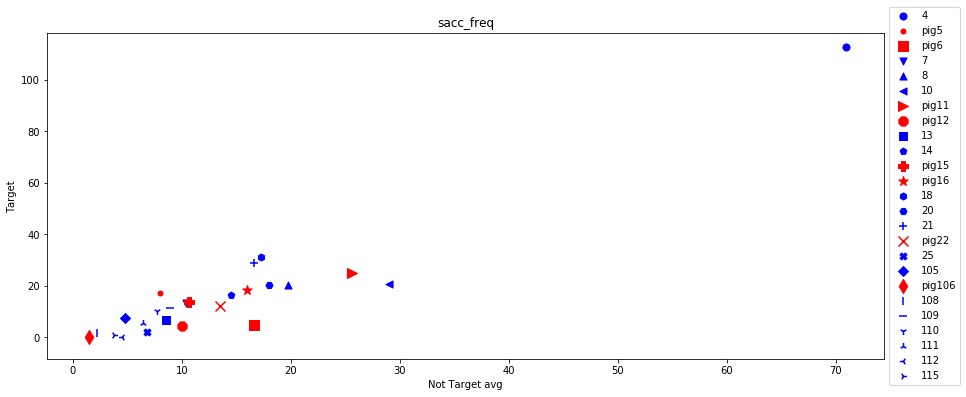

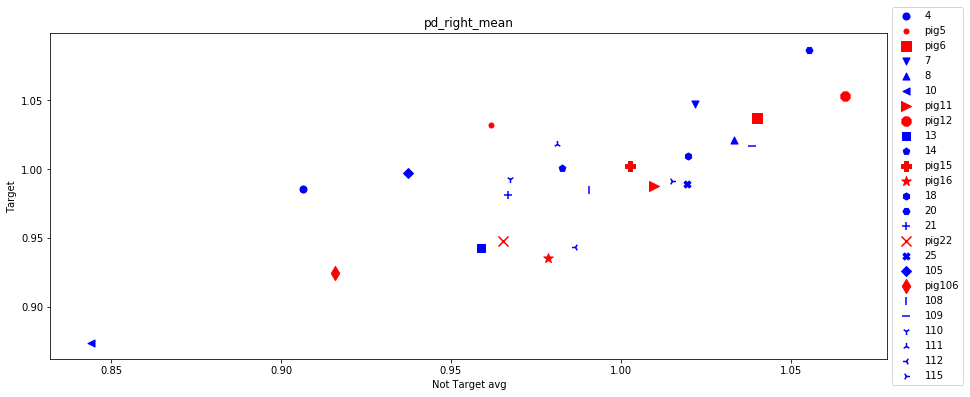

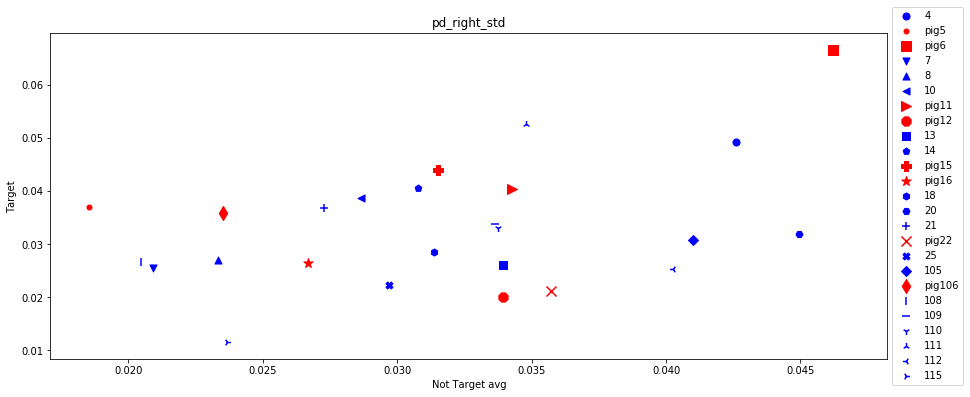

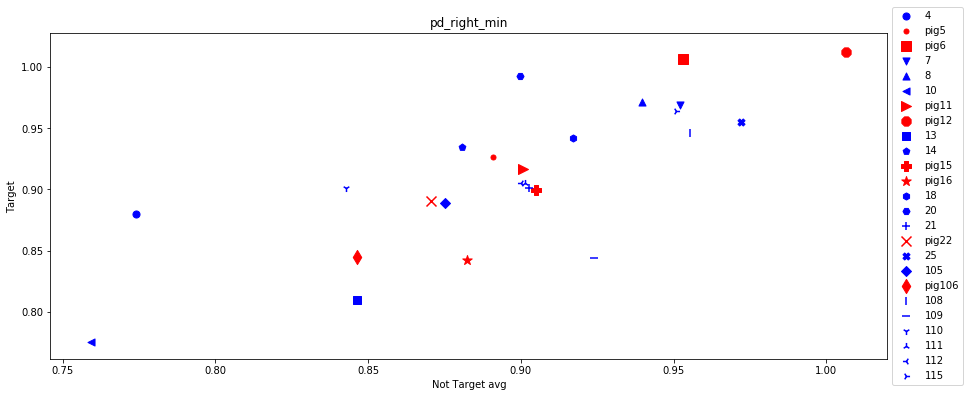

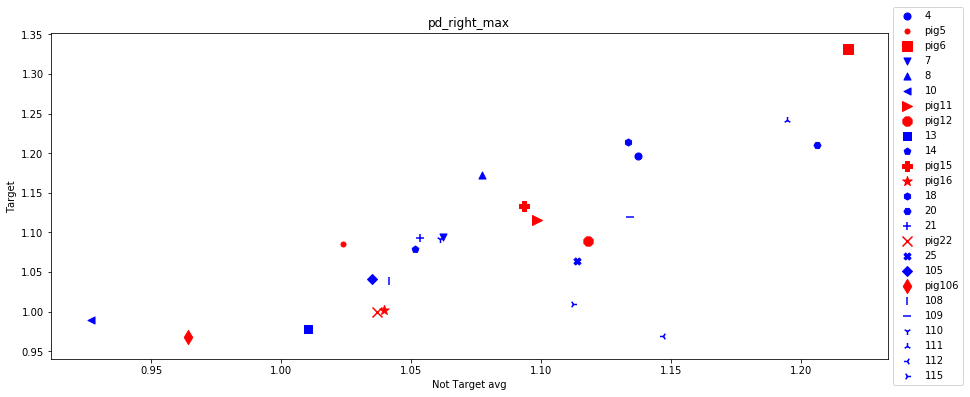

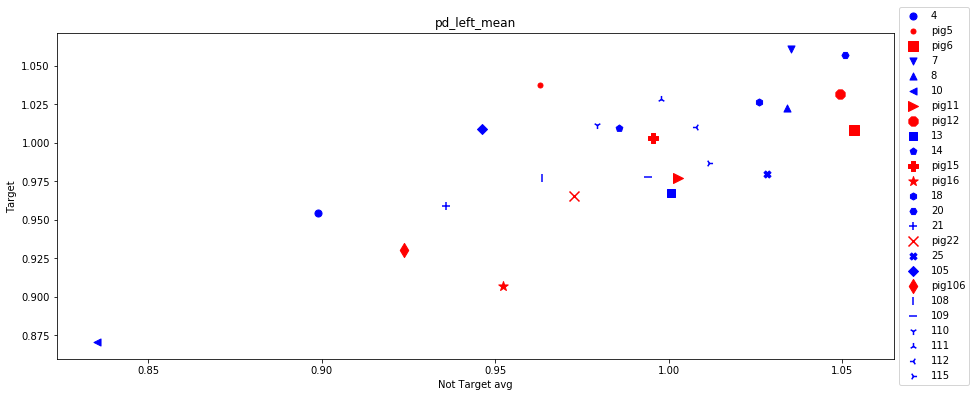

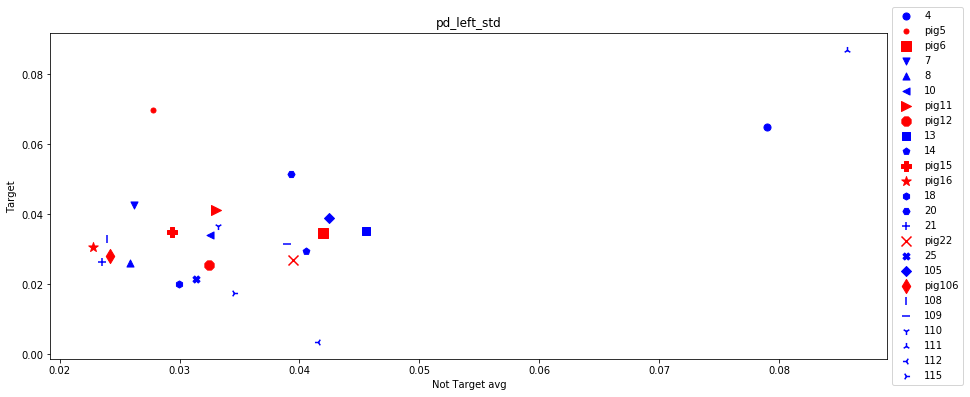

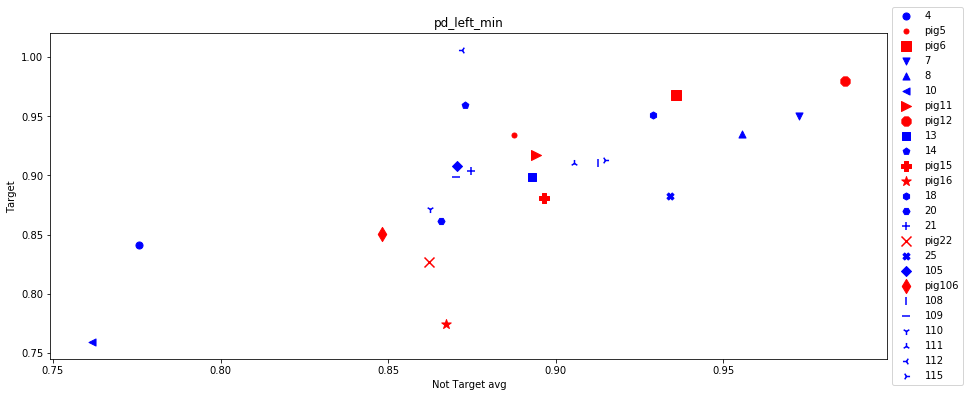

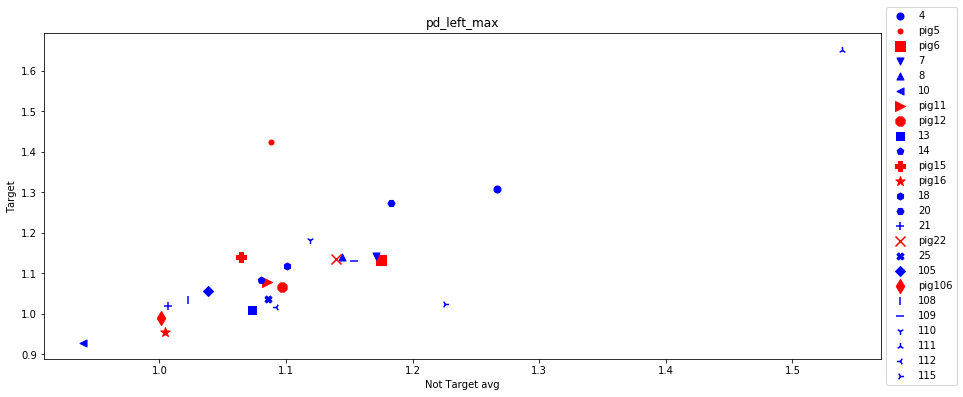

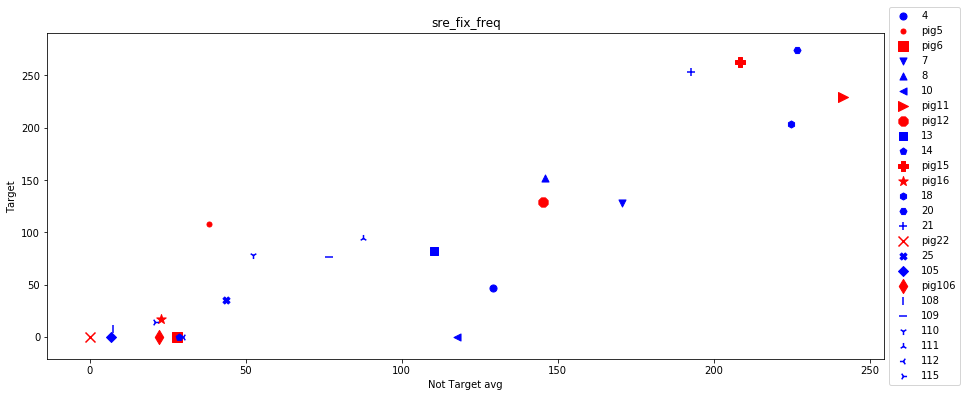

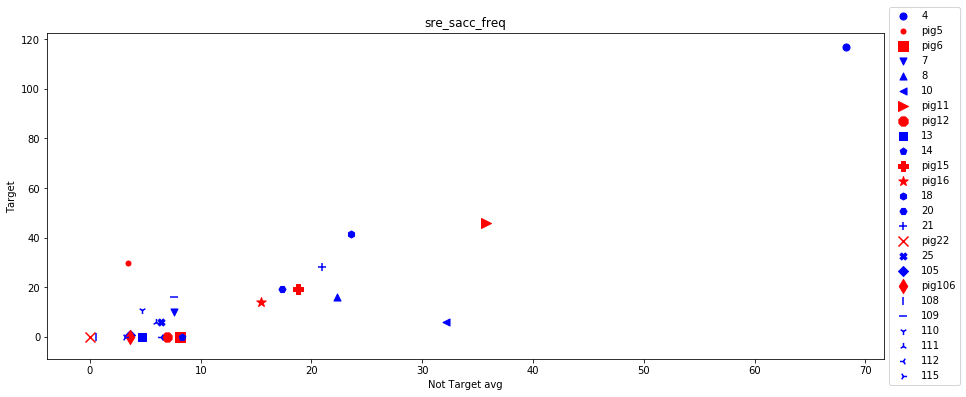

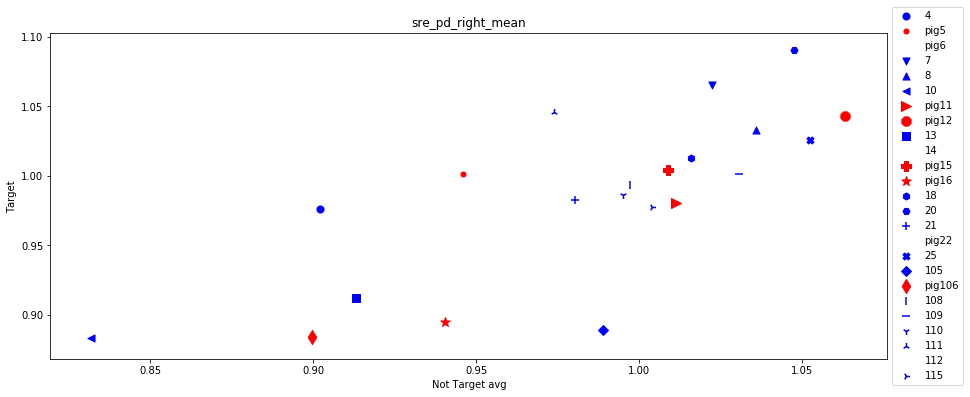

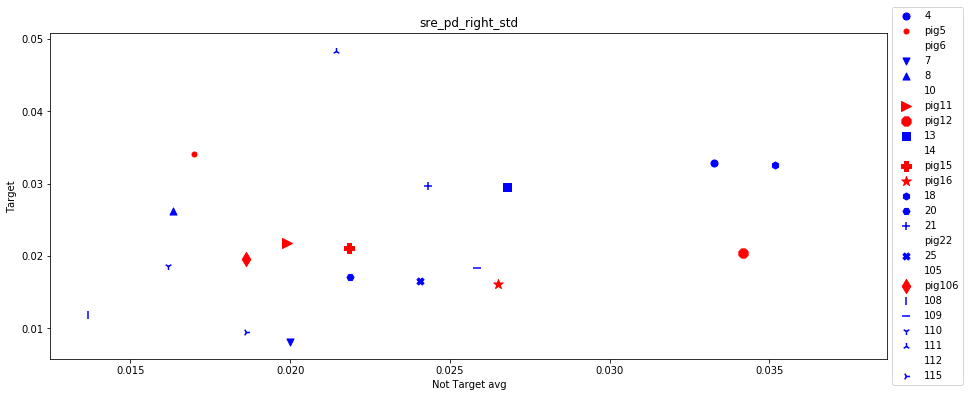

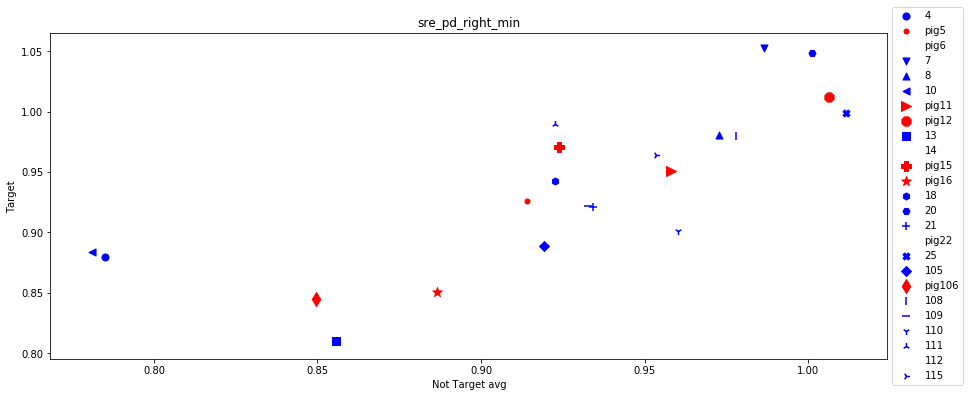

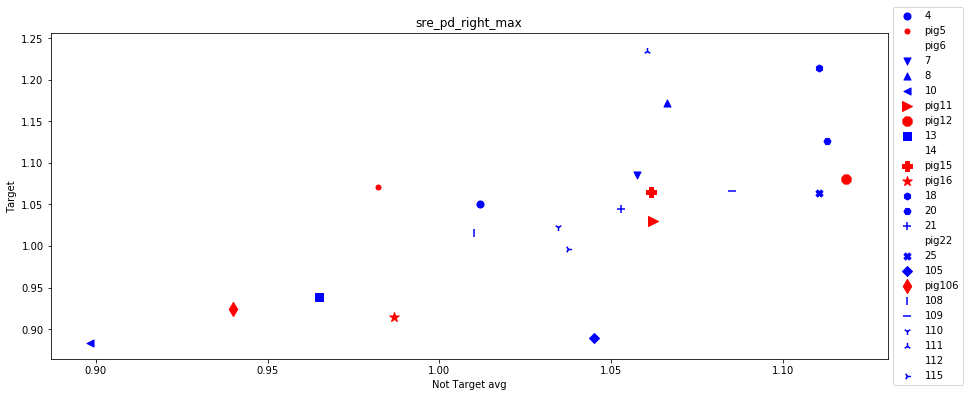

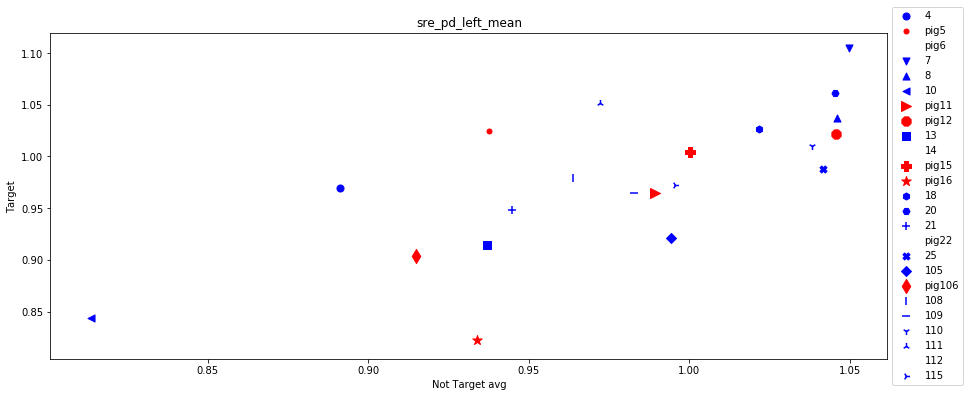

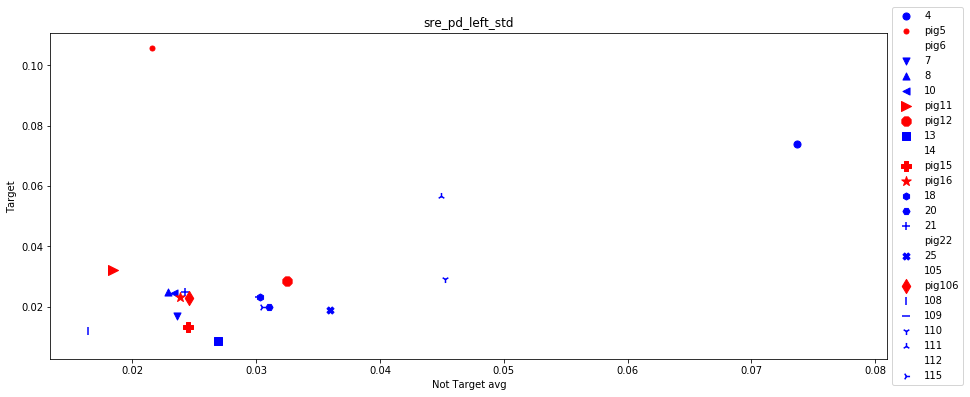

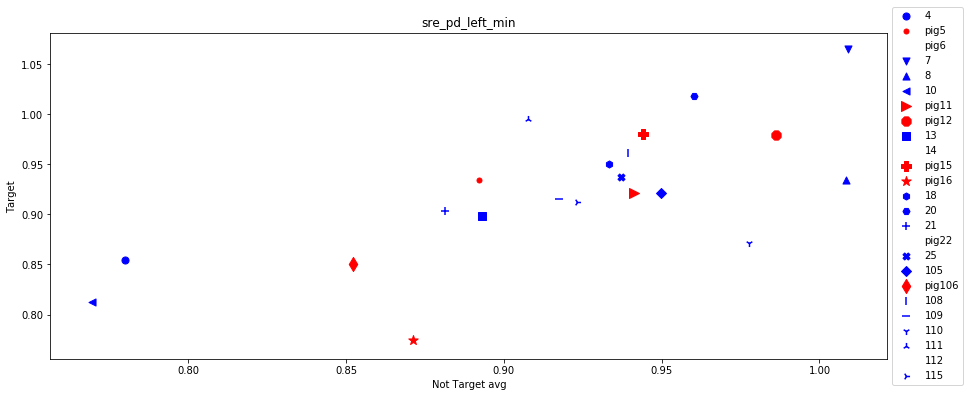

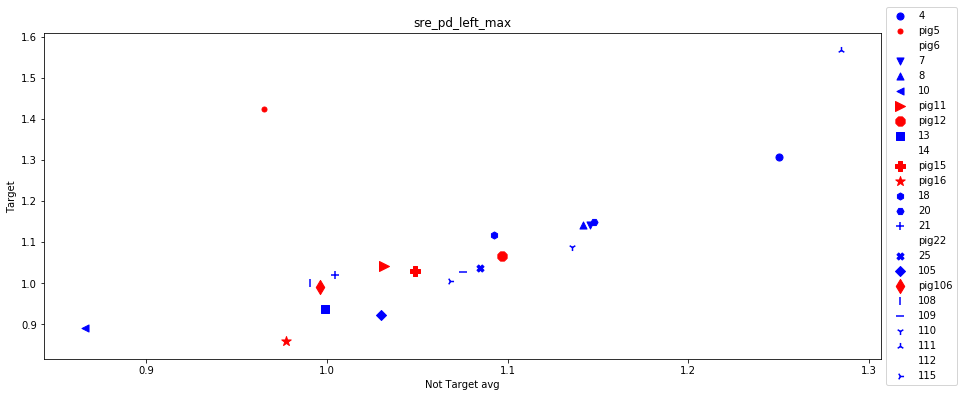

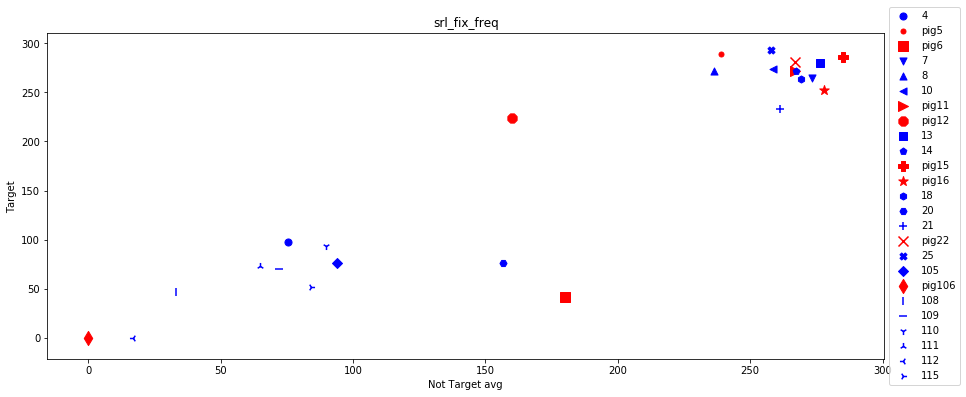

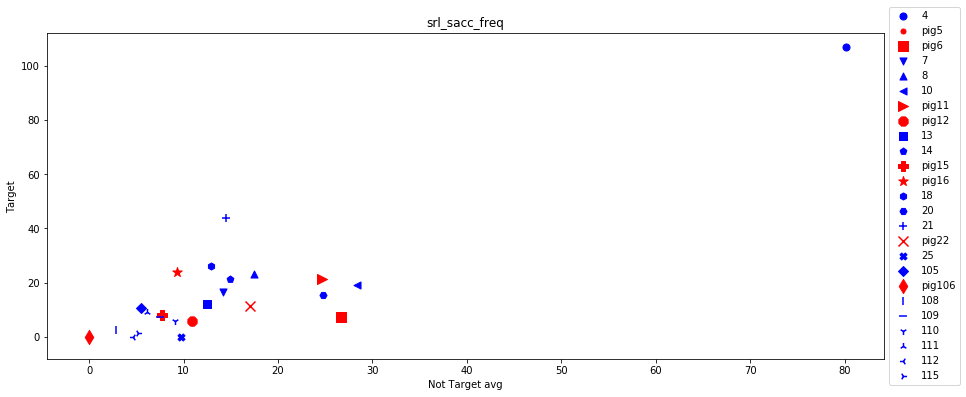

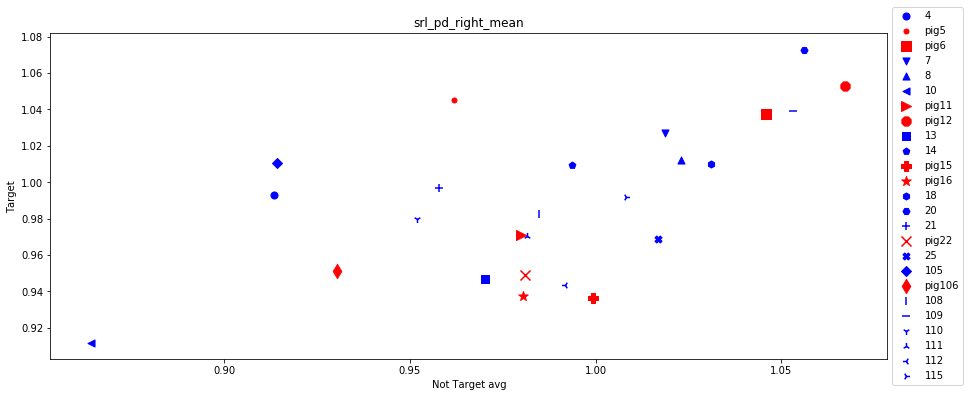

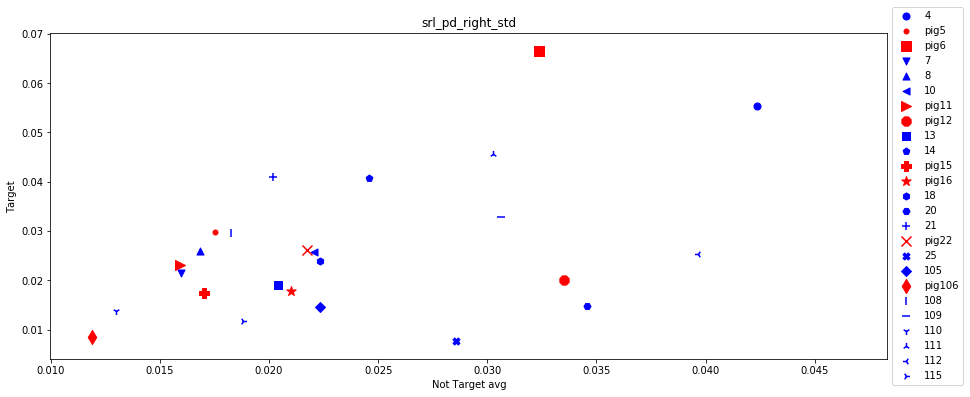

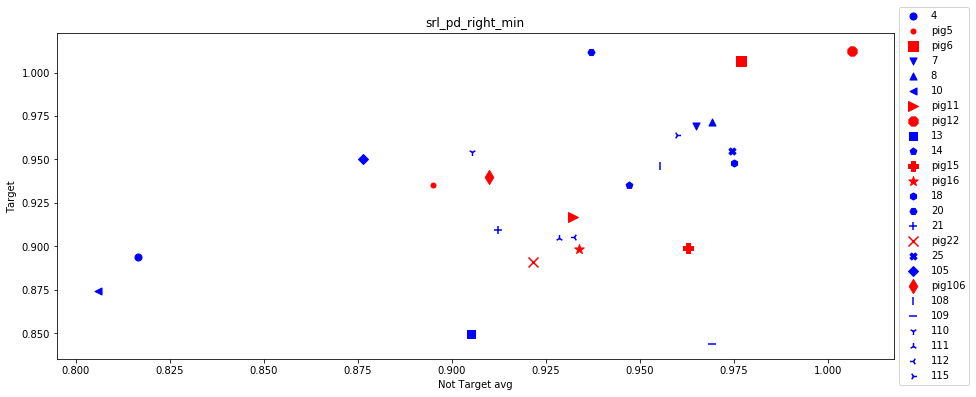

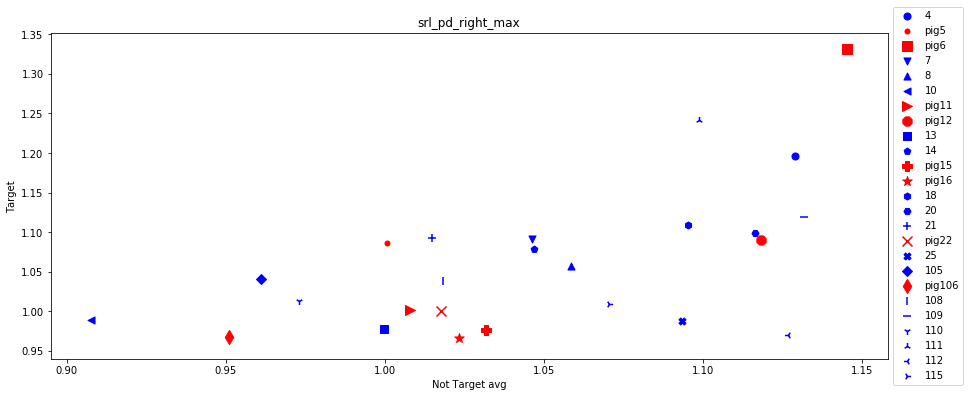

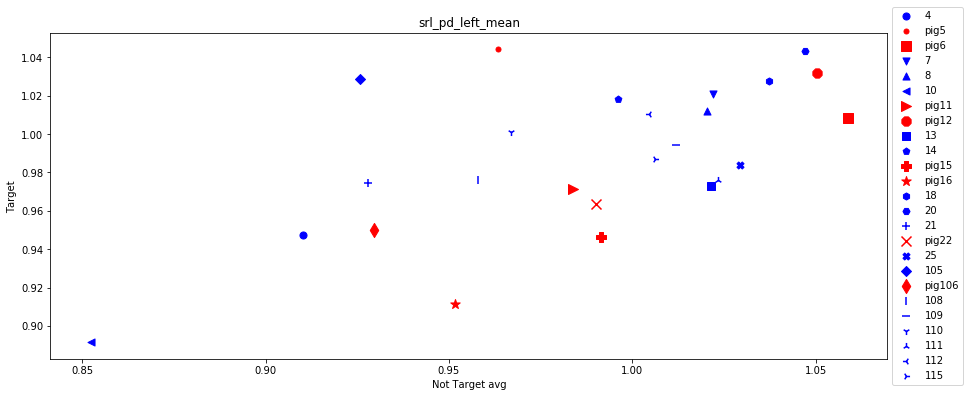

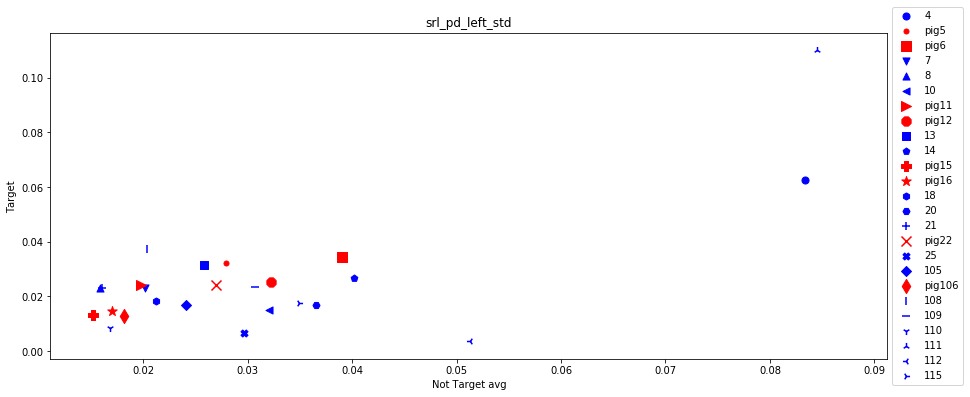

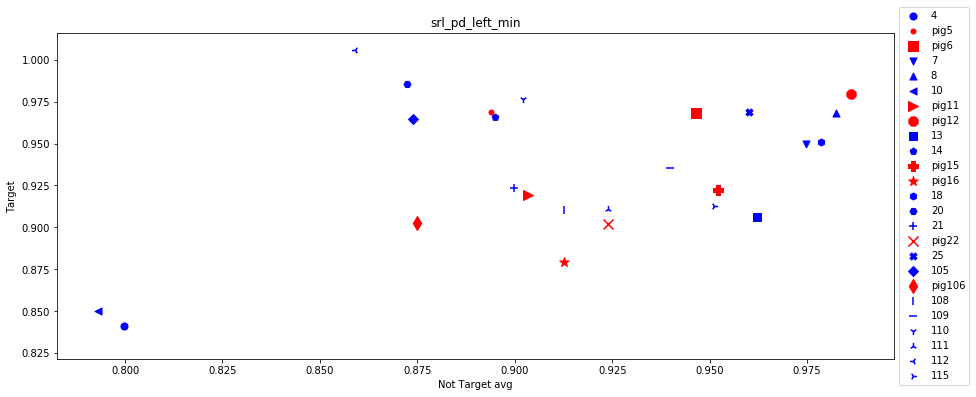

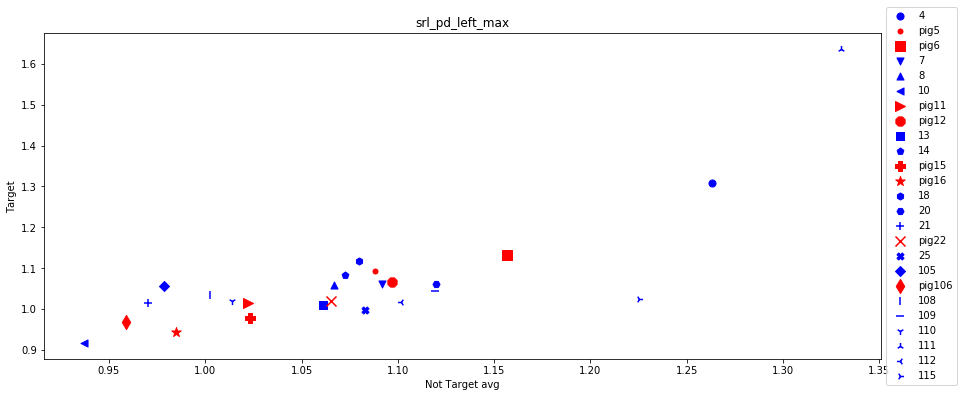

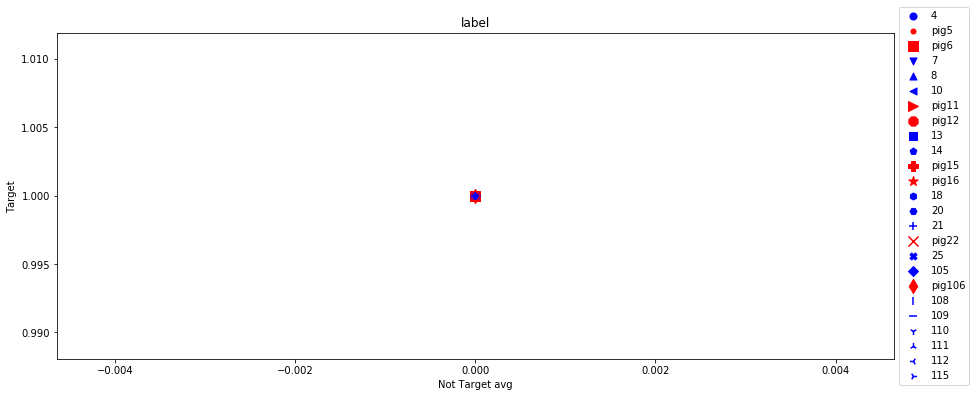

In [17]:

for f in feat_cols:
    fig, axs = plt.subplots(1, figsize=(15, 6))
    labels = []
    for i, sub in enumerate(subjects):
        axs.set_title("{}".format(f))
        axs.set_xlabel("Not Target avg")
        axs.set_ylabel("Target")
        axs.set_label("{}".format(sub))

        if(aggrOnes.loc[aggrOnes['subject'] == sub]["card_class"].values[0] == "pig"):
            size=100
            color = "r"
            labels.append("pig{}".format(sub))
        else:
            size=50
            color = "b"
            labels.append("{}".format(sub))

        axs.scatter(aggrZeros.loc[aggrZeros['subject'] == sub][f],
                    aggrOnes.loc[aggrOnes['subject'] == sub][f],
                    s=size,
                    c=color,
                    marker=markers[i])    
    plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig("plots/div/avgNTvsT_{}".format(f))


plt.show()
#axs[c].scatter(zeros["subject"], zeros[col], s=60, c="b", marker=".")
